In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install geopandas
#import geopandas as gp
from scipy.stats import linregress
import plotly.graph_objects as go
import random

ModuleNotFoundError: No module named 'plotly'

In [2]:
mydf = pd.read_csv("meat_CO2_v4.csv")
mydf

,country,meat_kg_pc,CO2_tonnes_pc,population
0,Afghanistan,8.59,0.3124,37171922
1,Albania,47.51,1.5757,2866376
2,Algeria,18.06,3.5346,42228415
3,Angola,23.49,0.6754,30809787
4,Antigua and Barbuda,72.04,4.3952,96282
...,...,...,...,...
164,Venezuela,40.94,2.9754,28887117
165,Vietnam,63.33,2.6126,95545959
166,Yemen,16.86,0.3275,28498683
167,Zambia,13.12,0.3575,17351714


In [3]:
mydf.describe()

,meat_kg_pc,CO2_tonnes_pc,population
count,169.000000,169.000000,1.690000e+02
mean,48.883373,4.076527,4.361590e+07
std,29.679123,5.003234,1.542415e+08
min,3.780000,0.038900,5.243800e+04
25%,21.390000,0.726300,2.801543e+06
50%,45.640000,2.509000,9.775564e+06
75%,71.390000,5.024900,3.152803e+07
max,137.070000,30.448200,1.402760e+09


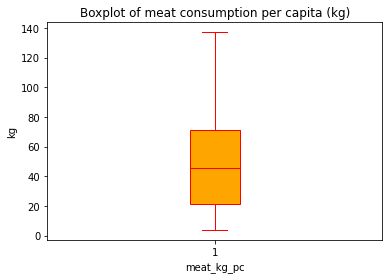

In [4]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp


fig, ax = plt.subplots()
box_plot(mydf.meat_kg_pc, 'red', 'orange')
ax.set_title("Boxplot of meat consumption per capita (kg)")
ax.set_xlabel("meat_kg_pc")
ax.set_ylabel("kg")
plt.show()

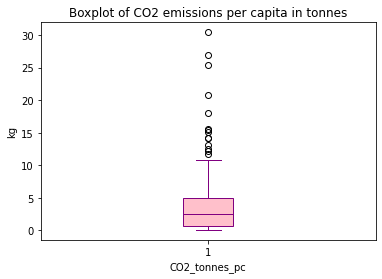

In [5]:
fig, ax = plt.subplots()
box_plot(mydf.CO2_tonnes_pc, 'purple', 'pink')
ax.set_title("Boxplot of CO2 emissions per capita in tonnes")
ax.set_xlabel("CO2_tonnes_pc")
ax.set_ylabel("kg")
plt.show()

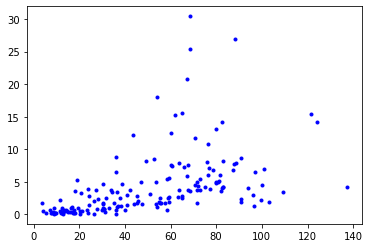

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
lines = ax.plot(mydf.meat_kg_pc,mydf.CO2_tonnes_pc,'b.')
lines

slope is: 0.0849, intercept is: -0.0744
equation: y = x*0.0849 + -0.0744
R-squared value is 0.254


Text(0, 0.5, 'CO2 emissions per capita (tonnes)')

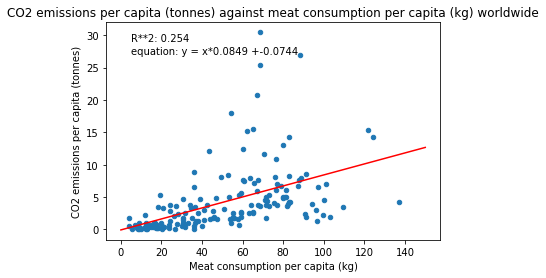

In [8]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(mydf.meat_kg_pc,mydf.CO2_tonnes_pc)
print(f"slope is: {slope:.3g}, intercept is: {intercept:.3g}")
print(f"equation: y = x*{slope:.3g} + {intercept:.3g}")
rsquared = rvalue*rvalue
print(f"R-squared value is {rsquared:.3g}")

# plot data points
ax = mydf.plot(x='meat_kg_pc',y='CO2_tonnes_pc',kind='scatter')

# to draw line we take x values at each end of the plot
x0 = 0
x1 = 150

# then use eqn to find corresponding y-values
y0 = x0*slope+intercept
y1 = x1*slope+intercept

# we can now plot a line from (x0,y0) to (x1,y1)
ax.plot([x0,x1],[y0,y1],'r-')
ax.text(5, 29, f"R**2: {rsquared:.3g}");
ax.text(5, 27, f"equation: y = x*{slope:.3g} +{intercept:.3g}")
ax.set_title("CO2 emissions per capita (tonnes) against meat consumption per capita (kg) worldwide")
ax.set_xlabel("Meat consumption per capita (kg)")
ax.set_ylabel("CO2 emissions per capita (tonnes)")

In [9]:
np.random.seed(42)
N = len(mydf)
colors = np.random.rand(N)
area = (25 * np.random.rand(N))**2

df = pd.DataFrame({
    'X': mydf.meat_kg_pc,
    'Y': mydf.CO2_tonnes_pc,
    'Colors': colors,
    "bubble_size":area})

Text(0, 0.5, 'CO2 emissions per capita (tonnes)')

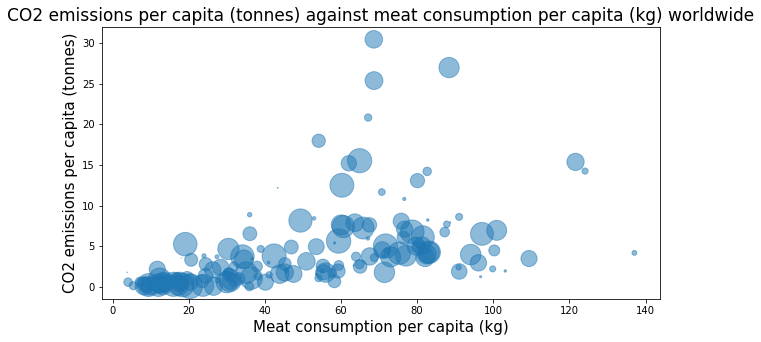

In [10]:
plt.figure(figsize = (10,5))
plt.scatter('X', 'Y', 
             s='bubble_size',
             alpha=0.5, 
             data=df)
plt.title("CO2 emissions per capita (tonnes) against meat consumption per capita (kg) worldwide", size=17)
plt.xlabel("Meat consumption per capita (kg)", size=15)
plt.ylabel("CO2 emissions per capita (tonnes)", size=15)